In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import  accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from catboost import CatBoostClassifier

In [124]:
def print_scores(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    preds = model.predict(X_val)

    print(f"ROC-AUC: {roc_auc_score(y_val, probs):.3f}")

    print(f"Accuracy: {accuracy_score(y_val, preds):.3f}")
    print(f"Precision: {precision_score(y_val, preds):.3f}")
    print(f"Recall: {recall_score(y_val, preds):.3f}")
    print(f"F1-score: {f1_score(y_val, preds):.3f}")

In [ ]:
TARGET = 'target'

## Credit_call ##

In [136]:
credit_call = pd.read_csv('data-sc\credit_call_train.csv')
credit_call_oot = pd.read_csv('data-sc\credit_call_oot.csv')

In [62]:
credit_call.head(5)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,target
0,1.211681,0.335461,-1.580455,-0.000858,2.332717,0.750173,1.883894,-2.635147,1.365436,3.522903,...,-0.565970,-9.129770,1.235737,-0.810103,-1.559518,0.496678,-1.385348,-0.643885,1.002557,0
1,0.174341,0.134085,-0.588195,0.824222,-2.442672,1.001573,6.526510,-3.451080,4.451836,3.766603,...,-0.272995,-9.579793,5.663820,0.859279,3.547581,-1.667511,-0.668737,-1.700060,-1.576135,0
2,0.175610,-0.043694,0.187320,1.496771,-1.150396,0.600350,0.327053,-1.723265,3.245481,2.576468,...,-0.465527,1.827193,-3.517654,-2.261850,-1.751795,1.976949,-0.357488,0.166761,-0.063635,1
3,2.545300,-0.851761,0.457882,-0.341087,4.816048,-1.580577,2.844267,-4.043435,-5.551251,4.635819,...,0.652415,2.252149,-1.791839,0.057800,-6.399451,-2.684771,0.018768,-1.335445,-0.453394,0
4,-1.819177,-1.038639,-0.581370,1.643532,0.293988,1.680042,-0.803473,2.827107,3.136421,1.933325,...,-1.124212,4.770606,-5.123232,1.209339,-3.570823,3.944495,0.540125,-0.787692,-0.438116,0


In [65]:
y = credit_call[TARGET]
X = credit_call.drop(columns = 'target')

In [144]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

LogReg

In [67]:
grid_lr = {
    "C": [1000, 500, 250, 100, 50, 25, 10, 5, 2.5, 1.0, 0.5, 0.1, 0.01, 0.001]
}

GS_LR = GridSearchCV(LogisticRegression(), param_grid=grid_lr, scoring="roc_auc", cv=5, verbose=3)

In [68]:
GS_LR.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ............................C=1000;, score=0.917 total time=   1.4s
[CV 2/5] END ............................C=1000;, score=0.920 total time=   1.3s
[CV 3/5] END ............................C=1000;, score=0.915 total time=   1.4s
[CV 4/5] END ............................C=1000;, score=0.913 total time=   1.4s
[CV 5/5] END ............................C=1000;, score=0.915 total time=   1.1s
[CV 1/5] END .............................C=500;, score=0.917 total time=   1.2s
[CV 2/5] END .............................C=500;, score=0.920 total time=   1.3s
[CV 3/5] END .............................C=500;, score=0.915 total time=   1.0s
[CV 4/5] END .............................C=500;, score=0.913 total time=   1.1s
[CV 5/5] END .............................C=500;, score=0.915 total time=   1.5s
[CV 1/5] END .............................C=250;, score=0.917 total time=   1.2s
[CV 2/5] END .............................C=250;

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1000, 500, 250, 100, 50, 25, 10, 5, 2.5, 1.0,
                               0.5, 0.1, 0.01, 0.001]},
             scoring='roc_auc', verbose=3)

In [69]:
GS_LR.best_params_
#{'C': 0.001}

{'C': 0.001}

In [145]:
print_scores(GS_LR, X_train, y_train)
# ROC-AUC: 0.921
# Accuracy: 0.966
# Precision: 0.867
# Recall: 0.441
# F1-score: 0.584

ROC-AUC: 0.921
Accuracy: 0.966
Precision: 0.867
Recall: 0.441
F1-score: 0.584


In [71]:
params_lr = {'C': 0.001}
lr = LogisticRegression(**params_lr)
lr.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [72]:
y_oot = credit_call_oot[TARGET]
X_oot = credit_call_oot.drop(columns = 'target')

In [73]:
#на отложенной выборке
print_scores(lr, X_oot, y_oot)
# ROC-AUC: 0.915
# Accuracy: 0.968
# Precision: 0.891
# Recall: 0.464
# F1-score: 0.610

ROC-AUC: 0.915
Accuracy: 0.968
Precision: 0.891
Recall: 0.464
F1-score: 0.610


In [111]:
preds_lr = lr.predict_proba(X_val)[:, 1]
preds_train_lr = lr.predict_proba(X_train)[:, 1]

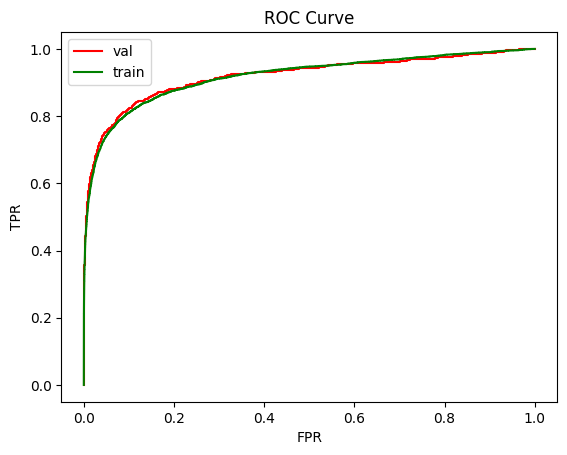

In [112]:
fpr, tpr, _ = roc_curve(y_val, preds_lr)
fpr1, tpr1, _ = roc_curve(y_train, preds_train_lr)

plt.plot(fpr, tpr, color='r', label='val')
plt.plot(fpr1, tpr1, color='g', label='train')
  
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
  
plt.legend()
plt.show()

Text(0.5, 1.0, 'Permutation Importance')

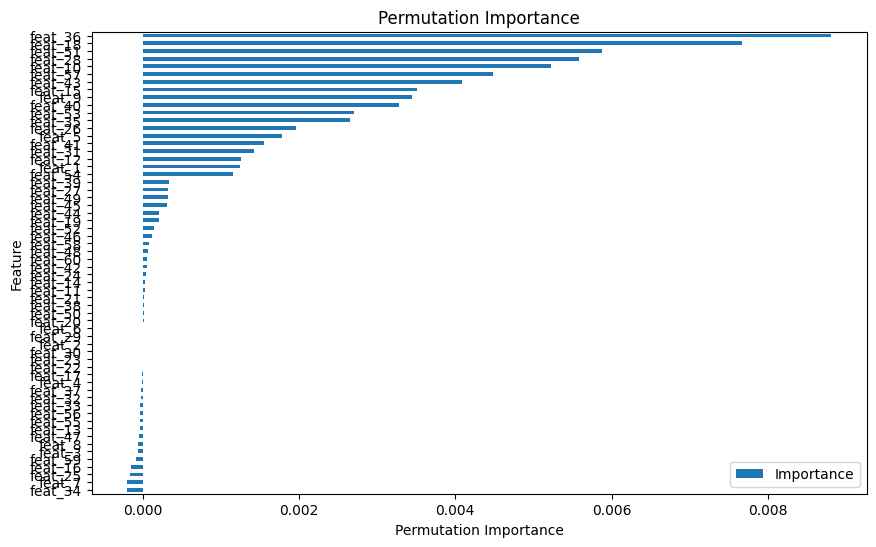

In [129]:
result = permutation_importance(lr, X_val, y_val, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance')              

На тренировочной выборке метрика ROC-AUC составила - 0.921, на отложенной - 0.915, 0.006 - разница, по ROC curve можно сделать вывод, что модель не переобучена.

XGClassifier

In [74]:
params_cls = {
     'learning_rate': [0.3, 0.5, 0.7, 1.0],
     'objective': ['binary:logistic'],
     'eval_metric': ['auc'],
     'n_jobs': [-1],
     'alpha': [0, 1, 10]
     }

cls = xgb.XGBClassifier()
GSC_XGB = GridSearchCV(cls, param_grid=params_cls, scoring='roc_auc', cv=3, verbose=3)

In [75]:
GSC_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END alpha=0, eval_metric=auc, learning_rate=0.3, n_jobs=-1, objective=binary:logistic;, score=0.958 total time=  50.0s
[CV 2/3] END alpha=0, eval_metric=auc, learning_rate=0.3, n_jobs=-1, objective=binary:logistic;, score=0.954 total time= 1.0min
[CV 3/3] END alpha=0, eval_metric=auc, learning_rate=0.3, n_jobs=-1, objective=binary:logistic;, score=0.952 total time= 1.0min
[CV 1/3] END alpha=0, eval_metric=auc, learning_rate=0.5, n_jobs=-1, objective=binary:logistic;, score=0.955 total time= 1.0min
[CV 2/3] END alpha=0, eval_metric=auc, learning_rate=0.5, n_jobs=-1, objective=binary:logistic;, score=0.951 total time=  57.0s
[CV 3/3] END alpha=0, eval_metric=auc, learning_rate=0.5, n_jobs=-1, objective=binary:logistic;, score=0.952 total time= 1.3min
[CV 1/3] END alpha=0, eval_metric=auc, learning_rate=0.7, n_jobs=-1, objective=binary:logistic;, score=0.956 total time= 1.0min
[CV 2/3] END alpha=0, eval_metric=auc, lear

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0, 1, 10], 'eval_metric': ['auc'],
                         'learning_rate': [0.3, 0.5, 0.7, 1.0], 'n_jobs': [-1],
                         'objective': ['binary:logistic']},
             scoring='roc_auc', verbose=3)

In [76]:
GSC_XGB.best_params_
# {'alpha': 0,
#  'eval_metric': 'auc',
#  'learning_rate': 0.3,
#  'n_jobs': -1,
#  'objective': 'binary:logistic'}

{'alpha': 0,
 'eval_metric': 'auc',
 'learning_rate': 0.3,
 'n_jobs': -1,
 'objective': 'binary:logistic'}

In [77]:
print_scores(GSC_XGB, X_val, y_val)
# ROC-AUC: 0.961
# Accuracy: 0.984
# Precision: 0.975
# Recall: 0.717
# F1-score: 0.826

ROC-AUC: 0.961
Accuracy: 0.984
Precision: 0.975
Recall: 0.717
F1-score: 0.826


In [86]:
params_xgb = {'alpha': 0,
 'eval_metric': 'auc',
 'learning_rate': 0.3,
 'n_jobs': -1,
 'objective': 'binary:logistic'}
xgb_model = xgb.XGBClassifier(**params_xgb)
xgb_model.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, ...)

In [88]:
#на отложенной выборке
print_scores(xgb_model, X_oot, y_oot)
# ROC-AUC: 0.951
# Accuracy: 0.983
# Precision: 0.977
# Recall: 0.706
# F1-score: 0.820

ROC-AUC: 0.951
Accuracy: 0.983
Precision: 0.977
Recall: 0.706
F1-score: 0.820


In [125]:
preds_xg = xgb_model.predict_proba(X_val)[:, 1]
preds_train_xg = xgb_model.predict_proba(X_train)[:, 1]

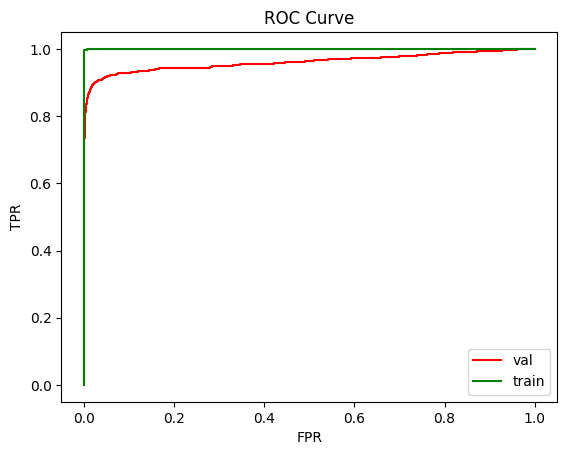

In [126]:
fpr, tpr, _ = roc_curve(y_val,  preds_xg)
fpr1, tpr1, _ = roc_curve(y_train,  preds_train_xg)

plt.plot(fpr, tpr, color='r', label='val')
plt.plot(fpr1, tpr1, color='g', label='train')
  
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
  
plt.legend()
plt.show()

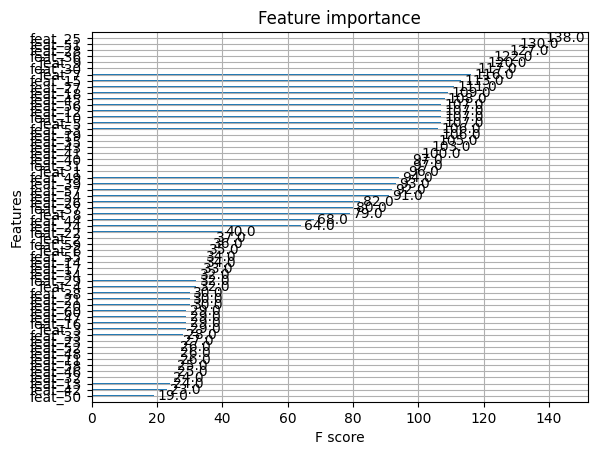

In [95]:
_ = xgb.plot_importance(xgb_model)

In [120]:
feature_importance_xgb = pd.DataFrame({'Feature': X.columns,
                                   'Importance': xgb_model.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values('Importance', ascending=True)

array([0.02305451, 0.00484467, 0.00612285, 0.00482362, 0.02947578,
       0.00524765, 0.02328508, 0.01988117, 0.03129453, 0.03482445,
       0.00719905, 0.02334756, 0.00537646, 0.00639315, 0.03693961,
       0.00558541, 0.00750453, 0.04093808, 0.02659785, 0.00732815,
       0.00638762, 0.00715683, 0.00547578, 0.02082664, 0.02338767,
       0.02650192, 0.02371834, 0.03502145, 0.00651655, 0.01962285,
       0.02909756, 0.00626359, 0.00557828, 0.00690408, 0.02076557,
       0.03721333, 0.0239779 , 0.00668512, 0.02585458, 0.03521721,
       0.02732864, 0.00486902, 0.02630485, 0.01263954, 0.02735789,
       0.00720567, 0.00642367, 0.00634251, 0.02581487, 0.00582811,
       0.02454941, 0.00506877, 0.01920628, 0.01252753, 0.00670493,
       0.01547083, 0.02497507, 0.00586355, 0.00655206, 0.00672974],
      dtype=float32)

XGB с подбором гиперпараметров показал себя не очень хорошо - скор на отложенном датасете упал на 0.01, но на ROC curve видно переобчение.

In [146]:
X_train, X_val, y_train, y_val = train_test_split(credit_call_new, y, test_size=0.2, shuffle=True)

In [139]:
params_lr = {'C': 0.001}
lr_final = LogisticRegression(**params_lr)
lr_final.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [147]:
print_scores(lr_final, X_train, y_train)

ROC-AUC: 0.919
Accuracy: 0.965
Precision: 0.866
Recall: 0.426
F1-score: 0.571


## Credit card call ##

In [313]:
credit_card_call = pd.read_csv('data-sc\credit_card_call_train.csv')
credit_card_call_oot = pd.read_csv('data-sc\credit_card_call_oot.csv')

In [314]:
y = credit_card_call[TARGET]
X = credit_card_call.drop(columns = 'target')

In [315]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [316]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 1.0, 'Permutation Importance')

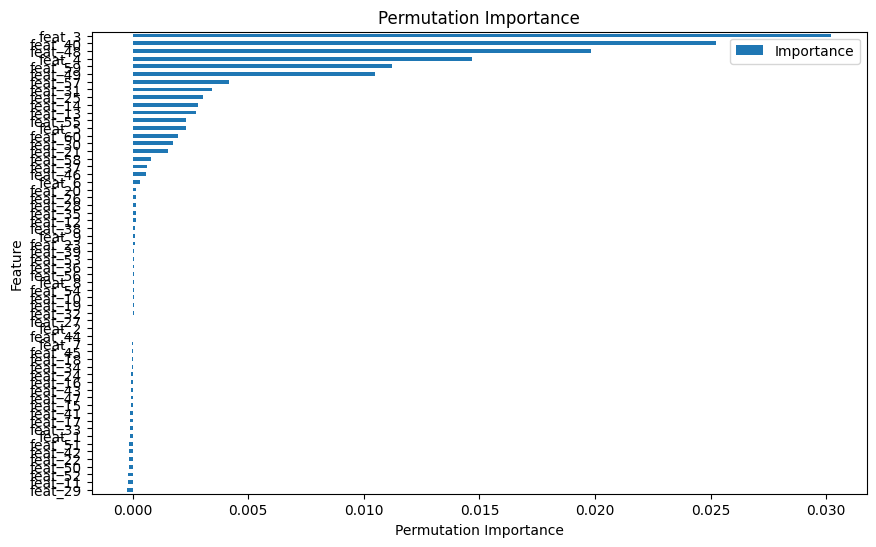

In [317]:
result = permutation_importance(lr, X_val, y_val, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance')     

In [318]:
#при выборе признаков я оставила только те, значение которых больше нуля
credit_card_call = credit_card_call.drop(columns = 'target')
y_oot = credit_card_call_oot[TARGET]
credit_card_call = credit_card_call[feature_importance.Feature[feature_importance.Importance>0]]
credit_card_call_oot = credit_card_call_oot[feature_importance.Feature[feature_importance.Importance>0]]

In [319]:
X_train, X_val, y_train, y_val = train_test_split(credit_card_call, y, test_size=0.2, shuffle=True)

In [320]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [321]:
print_scores(lr, X_train, y_train)
# ROC-AUC: 0.885
# Accuracy: 0.954
# Precision: 0.870
# Recall: 0.450
# F1-score: 0.593

ROC-AUC: 0.885
Accuracy: 0.955
Precision: 0.874
Recall: 0.453
F1-score: 0.596


In [323]:
#на отложенной выборке 
print_scores(lr, X_val, y_val)
# ROC-AUC: 0.875
# Accuracy: 0.951
# Precision: 0.873
# Recall: 0.415
# F1-score: 0.562

ROC-AUC: 0.875
Accuracy: 0.951
Precision: 0.873
Recall: 0.415
F1-score: 0.562


In [324]:
preds_lr = lr.predict_proba(X_val)[:, 1]
preds_train_lr = lr.predict_proba(X_train)[:, 1]

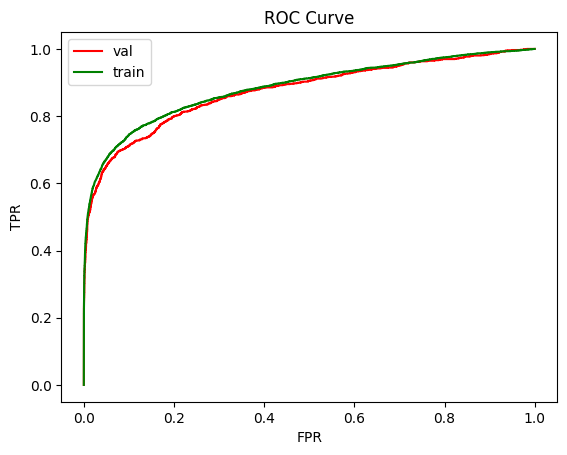

In [325]:
fpr, tpr, _ = roc_curve(y_val,  preds_lr)
fpr1, tpr1, _ = roc_curve(y_train,  preds_train_lr)

plt.plot(fpr, tpr, color='r', label='val')
plt.plot(fpr1, tpr1, color='g', label='train')
  
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
  
plt.legend()
plt.show()

Разница скоров на трейне и отложенной выборке составила 0.01, на отложенной выборке - 0.875. 

## Credit card sms ##

In [301]:
credit_card_sms = pd.read_csv('data-sc\credit_card_sms_train.csv')
credit_card_sms_oot = pd.read_csv('data-sc\credit_card_sms_oot.csv')

In [302]:
y = credit_card_sms[TARGET]
X = credit_card_sms.drop(columns = 'target')

In [303]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [304]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 1.0, 'Permutation Importance')

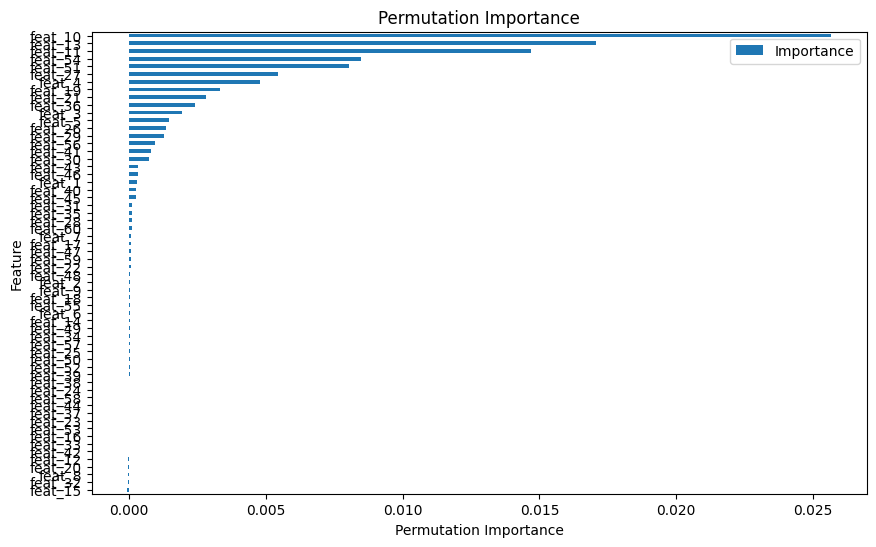

In [305]:
result = permutation_importance(lr, X_val, y_val, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance')   

In [306]:
#при выборе признаков я оставила только те, значение которых больше нуля
credit_card_sms = credit_card_sms.drop(columns = 'target')
y_oot = credit_card_sms_oot[TARGET]
credit_card_sms = credit_card_sms[feature_importance.Feature[feature_importance.Importance>0]]
credit_card_sms_oot = credit_card_sms_oot[feature_importance.Feature[feature_importance.Importance>0]]

In [307]:
X_train, X_val, y_train, y_val = train_test_split(credit_card_sms, y, test_size=0.2, shuffle=True)

In [308]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [309]:
print_scores(lr, X_train, y_train)
# ROC-AUC: 0.916
# Accuracy: 0.974
# Precision: 0.867
# Recall: 0.490
# F1-score: 0.626

ROC-AUC: 0.916
Accuracy: 0.974
Precision: 0.872
Recall: 0.499
F1-score: 0.635


In [310]:
#на отложенной выборке 
print_scores(lr, credit_card_sms_oot, y_oot)
# ROC-AUC: 0.912
# Accuracy: 0.974
# Precision: 0.878
# Recall: 0.483
# F1-score: 0.623

ROC-AUC: 0.912
Accuracy: 0.974
Precision: 0.878
Recall: 0.483
F1-score: 0.623


In [311]:
preds_lr = lr.predict_proba(X_val)[:, 1]
preds_train_lr = lr.predict_proba(X_train)[:, 1]

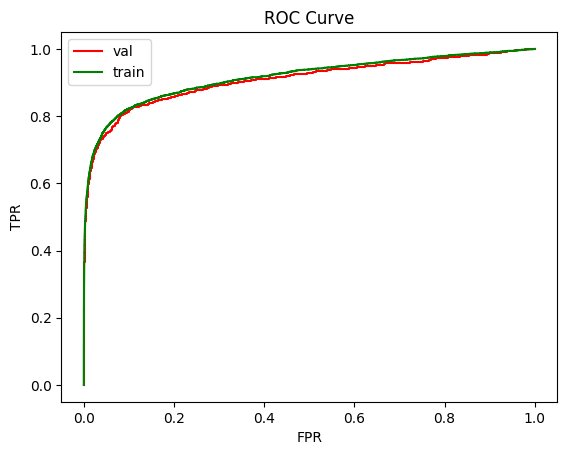

In [312]:
fpr, tpr, _ = roc_curve(y_val,  preds_lr)
fpr1, tpr1, _ = roc_curve(y_train,  preds_train_lr)

plt.plot(fpr, tpr, color='r', label='val')
plt.plot(fpr1, tpr1, color='g', label='train')
  
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
  
plt.legend()
plt.show()

На отложенной выборке ROC AUC - 0.912, на трейне - 0.916, разница 0,004, ROC кривая говорит об адеватности классификатора

## Credit sms ##

In [328]:
credit_sms = pd.read_csv('data-sc\credit_sms_train.csv')
credit_sms_oot = pd.read_csv('data-sc\credit_sms_oot.csv')

In [329]:
y = credit_sms[TARGET]
X = credit_sms.drop(columns = 'target')

In [330]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [331]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 1.0, 'Permutation Importance')

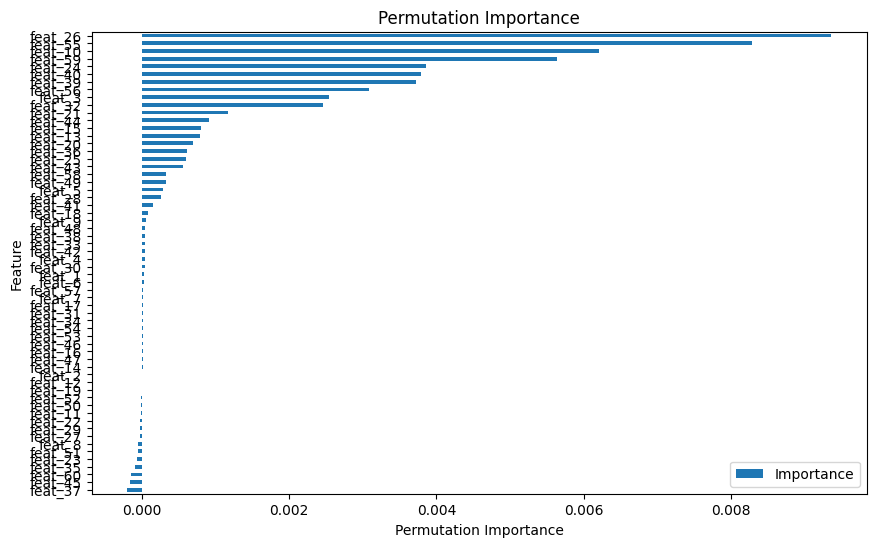

In [332]:
result = permutation_importance(lr, X_val, y_val, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance')   

In [333]:
#при выборе признаков я оставила только те, значение которых больше нуля
#помимо этого я попробоавала и комбинации признаков - топ 20, топ 30, но скор сильно не менялся
credit_sms = credit_sms.drop(columns = 'target')
y_oot = credit_sms_oot[TARGET]
credit_sms = credit_sms[feature_importance.Feature[feature_importance.Importance>0]]
credit_sms_oot = credit_sms_oot[feature_importance.Feature[feature_importance.Importance>0]]

In [334]:
X_train, X_val, y_train, y_val = train_test_split(credit_sms, y, test_size=0.2, shuffle=True)

In [335]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [336]:
print_scores(lr, X_train, y_train)
# ROC-AUC: 0.839
# Accuracy: 0.975
# Precision: 0.941
# Recall: 0.301
# F1-score: 0.456

ROC-AUC: 0.839
Accuracy: 0.975
Precision: 0.941
Recall: 0.301
F1-score: 0.456


In [337]:
#на отложенной выборке 
print_scores(lr, credit_sms_oot, y_oot)
# ROC-AUC: 0.835
# Accuracy: 0.975
# Precision: 0.934
# Recall: 0.309
# F1-score: 0.465

ROC-AUC: 0.835
Accuracy: 0.975
Precision: 0.934
Recall: 0.309
F1-score: 0.465


In [338]:
preds_lr = lr.predict_proba(X_val)[:, 1]
preds_train_lr = lr.predict_proba(X_train)[:, 1]

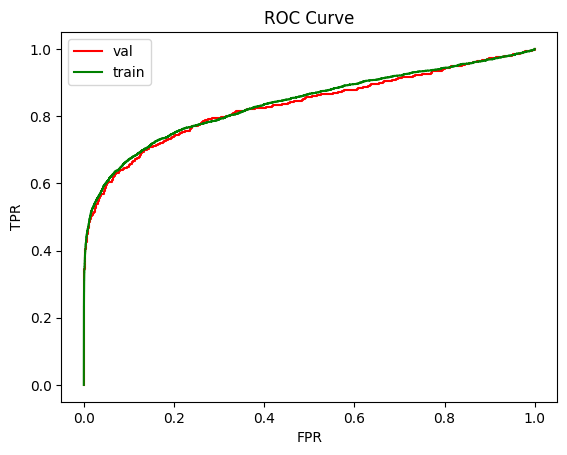

In [339]:
fpr, tpr, _ = roc_curve(y_val,  preds_lr)
fpr1, tpr1, _ = roc_curve(y_train,  preds_train_lr)

plt.plot(fpr, tpr, color='r', label='val')
plt.plot(fpr1, tpr1, color='g', label='train')
  
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
  
plt.legend()
plt.show()

На трейне модель показала результат - 0.839, а тестовой выборке на 0.004 меньше